In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker, load_gs_mesh, gs_Domain, read_eqdsk, create_isoflux



In [2]:
#mesh_pts, mesh_lc, mesh_reg, coil_dict, cond_dict = load_gs_mesh('nextstep_mesh.h5')
mesh_pts, mesh_lc, mesh_reg, coil_dict, cond_dict = load_gs_mesh('nextstep_divcoil.h5')

In [3]:
mygs = TokaMaker()
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict)
mygs.setup(order = 2, F0 =0.8*3) ## F0 = B0 * R0


#----------------------------------------------
OpenFUSIONToolkit Initialized
Development branch:   main
Revision id:          11ca7a7
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.914E+00
    # of points  =    4421
    # of edges   =   13144
    # of cells   =    8724
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  2.000E-03
    hrms =  3.848E-02
    hmax =  1.116

0
1
2
3


(0.25, 0.75)

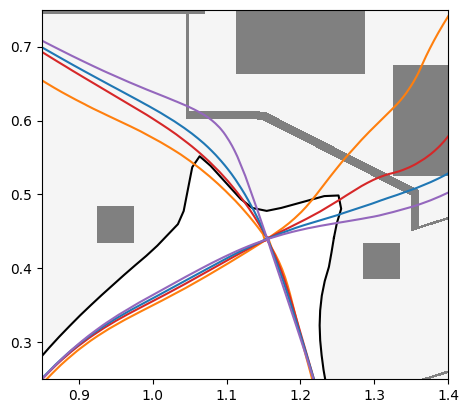

In [5]:


eqs = np.array(['sp_1_0.6_b', 'sp_2_0.6_b',  'sp_3_0.6_b', 'sp_4_0.6_b'])
colors = ['tab:orange', 'tab:red', 'tab:blue', 'tab:purple', 'tab:green' ]
import matplotlib.pyplot as plt
import numpy as np
from gfile_reader import gfile_read
from calc_bdry import calc_bdry
from calc_bdry import calc_xpoints
from calc_bdry import calc_strikepts
from calc_bdry import calc_alphas
fig, ax = plt.subplots(1,1)
mygs.plot_machine(fig,ax)
for i,eq in enumerate(eqs):
    print(i)
    gfile_dict1 = gfile_read(file0=eq, silent=True)

    Psi_rad = gfile_dict1['PSIRZ']
    Psi = (2.0*np.pi)*Psi_rad  ##Convert from Wb/Rad to Wb
    R_grid = gfile_dict1['R_grid']
    Z_grid = gfile_dict1['Z_grid']
    Psi_bdry = gfile_dict1['SIBRY'] #In wb/Rad

    R_maxis = gfile_dict1['RMAXIS']
    Z_maxis = gfile_dict1['ZMAXIS']

    Limitr_R = gfile_dict1['RLIM']
    Limitr_Z = gfile_dict1['ZLIM']
    nlim = int(gfile_dict1['LIMITR'])
    Limitr_R = Limitr_R[0:nlim]
    Limitr_Z = Limitr_Z[0:nlim]

    if i<1:
        key = 'sep2'
    else:
        key = 'sep'

    #Calculate the dictionary with the plasma boundary and sepratrix coordinates 
    bdry_dict1 = calc_bdry(np.linspace(-np.pi, np.pi, 361), R_maxis, Z_maxis, R_grid, Z_grid,\
    Psi_rad, Psi_bdry, xpt2=False, show_calc=False, reducebdry=0.0)# reducebdry=1.0)
    ax.plot(bdry_dict1['plasma_bdry'][0], bdry_dict1['plasma_bdry'][1], color=colors[i])
    ax.plot(bdry_dict1['upper_' + key][0], bdry_dict1['upper_' + key][1], color=colors[i])
    ax.plot(bdry_dict1['lower_' + key][0], bdry_dict1['lower_' + key][1], color=colors[i])

ax.set_xlim([0.85,1.4])
ax.set_ylim([0.25, 0.75])